In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
import re

In [2]:
def read_file(filename):
    with open(filename, "r") as f:
        data = f.read()[:-2]

    data = re.sub("^( )*","",data)
    data = re.sub("( )*\n( )*","\n",data)
    data = re.sub("( )+"," ",data)
    data_l = data.split("\n")
    for i in range(len(data_l)):
        data_l[i] = data_l[i].split(" ")
        data_l[i] = [ float(j) for j in data_l[i] ]
    data_l = np.array(data_l)
    return data_l

def one_hot(x, n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x), n))
    o_h[np.arange(len(x)), x] = 1
    return o_h

def init_centers(data, K):
    low, high = np.min(data, axis=0), np.max(data, axis=0)
    centers = []
    for i in range(K):
        centers.append(np.random.uniform(low, high))
    return np.array(centers)

def draw_loss_graph(losses):
    x_points = [i for i in range(0,len(losses))]
    cost_line, = plt.plot(x_points, losses)
    plt.title("Loss v/s Iteration")
    plt.show()

In [3]:
def get_clusters(data, centers):
    diff = (data[:, np.newaxis] - centers)**2
    dist_sq = np.sum(diff, axis=2)
    pred = np.argmin(dist_sq, axis=1)
    sse = np.sum(np.min(dist_sq, axis=1))/data.shape[0]
    return pred, sse

def step(data, pred, K):
    pred_onehot = one_hot(pred, K)
    group_sum = np.sum(data[:, np.newaxis] * pred_onehot[:,:,np.newaxis], axis=0, keepdims=True).reshape(pred_onehot.shape[1],2)
    centroids = group_sum/np.sum(pred_onehot, axis=0).reshape(pred_onehot.shape[1],1)
    return centroids

def display_clusters(data, centers, im):
    h1 = plt.scatter(data[:,0], data[:,1], c=im, label="Data Points")
    h2 = plt.scatter(centers[:,0], centers[:,1], c='b', marker='x', label="Centers")
    plt.legend(handles=[h1,h2])
    plt.show()

def gif(data, ims, c_array):
    plt.clf()
    for i in range(len(ims)):
        display.clear_output(wait=True)
        display.display(pl.gcf())
        centers = c_array[i]
        plt.scatter(data[:,0], data[:,1], c=ims[i], animated=True)
        plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
        time.sleep(0.1)
    x = plt.clf()

    
def kmeans(data, K, verbose = False):
    centers = init_centers(data, K)
    prev = np.zeros((K,2))
    preds = []
    c_array = []

    pred, sse = get_clusters(data, centers)
    stdouts = "Initial Loss: "+str(sse)+"\n"
    losses = [sse]

    for i in range(100):
        centers = step(data, pred, K)
        pred, sse = get_clusters(data, centers)
        if verbose:
            stdouts += "Iteration: "+str(i+1)+" Loss: "+str(sse)+"\n"
        if (prev == centers).all():
            break
        prev = centers
        losses.append(sse)
        preds.append(pred)
        c_array.append(centers)

    draw_loss_graph(losses)
    
    if verbose:
        print(stdouts)
    return preds[-1], centers , losses[-1]

Run number 1


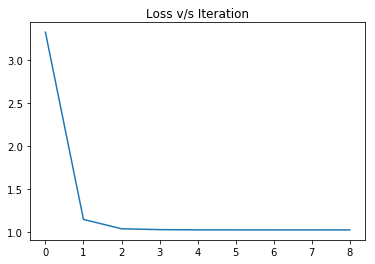

Run number 2


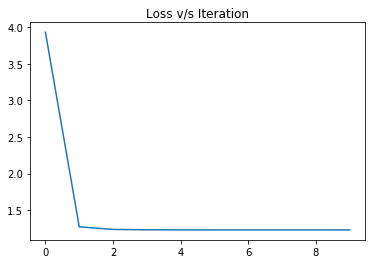

Run number 3


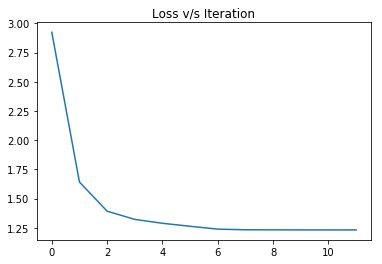

Run number 4


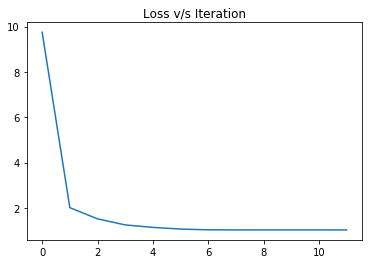

Run number 5


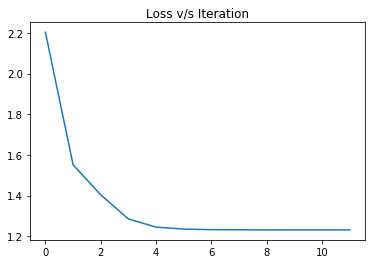

Lowest SSE during Run 0 SSE= 1.0261745127196495


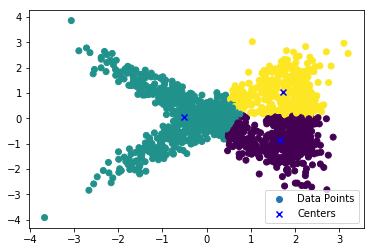

In [4]:
data = read_file("Dataset_2.txt")
r = 5

loss_array = []
preds_array = []
centers_array = []

for i in range(5):
    print("Run number",i+1)
    preds, centers, loss = kmeans(data, 3)
    loss_array.append(loss)
    preds_array.append(preds)
    centers_array.append(centers)
    
ix = np.argmin(loss_array)
print("Lowest SSE during Run",ix,"SSE=",loss_array[ix])
display_clusters(data, centers_array[ix], preds_array[ix])